# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Предоставленные данные**  
Архив объявлений о продаже квартир в Ленинградской области с 2014 по 2019 год. Всего 23699 строк.

**План работы**
1. Ознакомится с предоставленными данными.
2. Заполнить пропуски, где это возможно.
3. Исправить аномальные значения и ошибки ввода, если такие найдутся.
4. Исключить редкие, выделяющиеся данные.
5. Провести анализ факторов, влияющих на стоимость квартиры.

### Изучение общей информации

In [ ]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

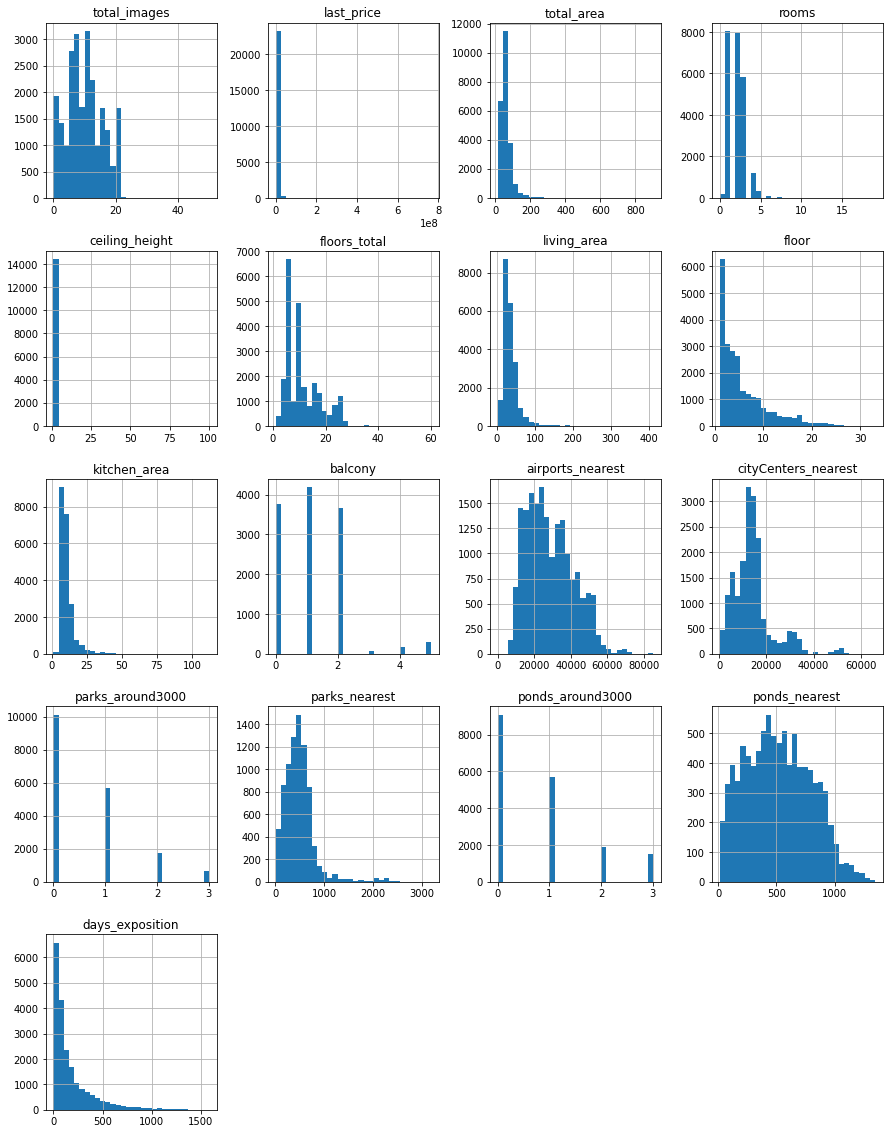

In [ ]:
data.hist(bins=30, figsize=(15, 20))

**Итог:** В данных 22 столбца, общее количество 23699 строк. Обнаруженные отклонения:  
- В части строк меньше значений, чем в других, следовательно, есть пропуски.
- Некоторые строки имеют неверный тип значений. К примеру, строка с количеством балконов имеет тип float64, хотя очевидно должен быть int, так как не может быть дробного числа балконов.
- Высота потолков аномальная и доходит до 100 метров.

### Предобработка данных

**2.1 Приведение названия столбцов к одному виду.**

In [ ]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**2.2 Поиск пропусков.**  
На основании выведенной ранее информации о данных пропуски в следующих столбцах:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- city_centers_nearest
- parks_around_3000
- parks_nearest
- ponds_around_3000
- ponds_nearest
- days_exposition

Исходя из логических соображений заполнить можно только пропуски в следующих столбцах:
- is_apartment - заполнение значением "False".
- balcony - заполнение значением "0".
- parks_around_3000 - заполнение значением "0".
- ponds_around_3000 - заполнение значением "0".

Посчитаем, сколько пропущенных значений в каждом стоблце.

In [ ]:
print('Количество пропущенных значений:')
print(f"в is_apartment {data['is_apartment'].isna().sum()} ({round(data['is_apartment'].isna().mean() * 100)}%),")
print(f"в balcony {data['balcony'].isna().sum()} ({round(data['balcony'].isna().mean() * 100)}%),")
print(f"в parks_around_3000 {data['parks_around_3000'].isna().sum()} ({round(data['parks_around_3000'].isna().mean() * 100)}%),")
print(f"в ponds_around_3000 {data['ponds_around_3000'].isna().sum()} ({round(data['ponds_around_3000'].isna().mean() * 100)}%).")

Количество пропущенных значений:
в is_apartment 20924 (88%),
в balcony 11519 (49%),
в parks_around_3000 5518 (23%),
в ponds_around_3000 5518 (23%).


В остальных столбцах нет возможности логично и корректно заполнить пропуски, так как ни медианное, ни среднее значение не подойдут. Каждый объект индивидуальный. К примеру, в столбце locality_name без знаний адреса объекта любое из возможных значений будет ошибочным.

**2.3 Заполнение значений в первых четырех столбцах.**

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Итог:** в нужных столбцах пропуски заполнены.

**2.4 Типы данных.**  
В данных есть шесть столбцов, в которых надо изменить тип значений.
- balcony - целое число, должен быть тип int.
- parks_around_3000 - целое число, должен быть тип int.
- ponds_around_3000 - целое число, должен быть тип int.
- days_exposition - целое число, должен быть тип int, но так как там пропуски, которые невозможно корректно заполнить, изменить тип значений не получится.
- floors_total - целое число, должен быть тип int, но так как там пропуски, которые невозможно корректно заполнить, изменить тип значений не получится.
- first_day_exposition - дата и время, должен быть тип datetime.

In [ ]:
data['balcony'] = data['balcony'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Итог:** тип данных изменен.

**2.5 Удаление неявных дубликатов.**

Удаление неявных дубликатов проведем в столбце locality_name.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
f"Всего уникальных значений в столбце locality_name {len(data['locality_name'].unique())}"

'Всего уникальных значений в столбце locality_name 365'

Удалим неявные дубликаты.

In [ ]:
data['locality_name'] = (
    data['locality_name']
    .replace(['поселок ', 'деревня ', 'посёлок ', 'поселок городского типа ', 'посёлок городского типа ',
              'городской посёлок ', 'садовое товарищество ', 'село ', 'поселок городского типа имени ',
              'поселок станции ', 'посёлок при железнодорожной станции ', 'посёлок станции ', 'коттеджный поселок ',
              'при железнодорожной станции ', 'городского типа ', 'городской ', 'станции ', 'коттеджный ',
              'садоводческое некоммерческое товарищество ', 'имени '], '', regex=True)
)
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [ ]:
f"Всего уникальных значений в столбце locality_name {len(data['locality_name'].unique())}"

'Всего уникальных значений в столбце locality_name 306'

**Итог:** неявные дубликаты удалены. Устранены порядка 60 дубликатов.

### Добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы.

**3.1 Цена одного квадратного метра**

In [ ]:
data['meter_cost'] = round((data['last_price'] / data['total_area']), 2)

**3.2 День недели публикации объявления**


In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday

**3.3 Месяц публикации объявления**


In [ ]:
data['month_public'] = data['first_day_exposition'].dt.month

**3.4 Год публикации объявления**


In [ ]:
data['year_public'] = data['first_day_exposition'].dt.year

**3.5 Тип этажа квартиры**


In [ ]:
def floor_type(floors):
    if floors['floor'] == 1:
        return 'первый'
    elif floors['floor'] == floors['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

**3.6 Расстояние до центра города в километрах**

In [ ]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

**3.7 Контроль корректности добавления столбцов**

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_cost,weekday,month_public,year_public,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


**Итог:** все столбцы добавлены и отображаются корректно.

### Исследовательский анализ данных

**4.1 Анализ общей площади**

In [ ]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Максимальное значение 900 кв. м, что значительно выше среднего и медианы. Посмотрим, не является ли ошибкой.

In [ ]:
data.query('total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_cost,weekday,month_public,year_public,floor_type,city_centers_nearest_km
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,...,NaN,2,318.0,106.0,466666.67,2,12,2017,последний,8.0


Скорее всего нет, так как другие параметры, так как цена, количество комнат, жилая зона и т.д. кажутся адекватными для такой площади.
Как видно из гистограммы в начале, квартир площадью более 200 относительно мало. Посмотрим сколько их.

In [ ]:
data.loc[data['total_area'] >= 200]['total_area'].count()

231

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data.loc[data['total_area'] < 200]

<AxesSubplot:>

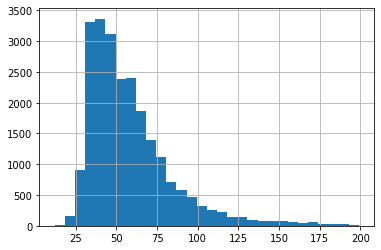

In [ ]:
data_filtered['total_area'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество квартир с площадью от 25 до 100 кв. м.

**4.2 Анализ жилой площади**

In [ ]:
data_filtered['living_area'].describe()

count    21594.000000
mean        33.243075
std         17.345962
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Посмотрим сколько квартир с жилой зоной площадью более 150 кв. м.

In [ ]:
data_filtered.loc[data_filtered['living_area'] >= 150]['living_area'].count()

3

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[(data_filtered['living_area'] < 150) | (data_filtered['living_area'].isna())]

<AxesSubplot:>

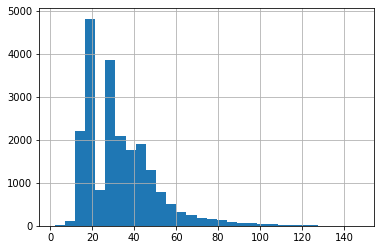

In [ ]:
data_filtered['living_area'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наблюдается два пика: 20 кв. м и 30 кв. м.

**4.3 Анализ площади кухни**


In [ ]:
data_filtered['kitchen_area'].describe()

count    21217.00000
mean        10.38388
std          5.36811
min          1.30000
25%          7.00000
50%          9.00000
75%         12.00000
max         93.20000
Name: kitchen_area, dtype: float64

Посмотрим сколько квартир, где кухня имеет площадь более 40 кв. м (на основе гистограммы в начале).

In [ ]:
data_filtered.loc[data_filtered['kitchen_area'] >= 50]['kitchen_area'].count()

34

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[(data_filtered['kitchen_area'] < 50) | (data_filtered['kitchen_area'].isna())]

<AxesSubplot:>

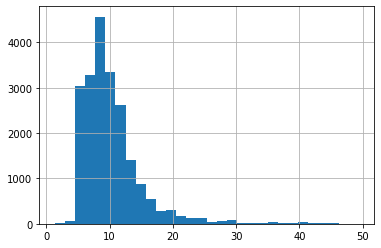

In [ ]:
data_filtered['kitchen_area'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество квартир с кухней около 8-9 кв. м.

**4.4 Анализ цены объекта**

In [ ]:
data_filtered['last_price'].describe()

count    2.343100e+04
mean     5.973676e+06
std      6.003165e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.680500e+06
max      3.300000e+08
Name: last_price, dtype: float64

Посмотрим, сколько квартир дороже 50 млн (на основе гистограммы в начале).

In [ ]:
data_filtered.loc[data_filtered['last_price'] >= 5.00e+07]['last_price'].count()

47

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[(data_filtered['last_price'] < 5.00e+07) | (data_filtered['last_price'].isna())]

<AxesSubplot:>

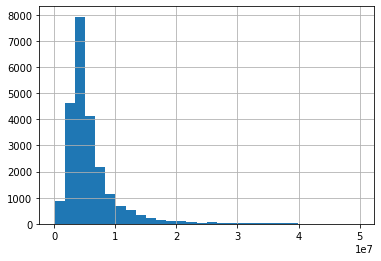

In [ ]:
data_filtered['last_price'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество квартир с ценой около 5 млн.

**4.5 Анализ количества комнат**

In [ ]:
data_filtered['rooms'].describe()

count    23384.000000
mean         2.029678
std          0.992453
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Квартир, где комнат более 6, немного (на основании гистограммы в начале). Соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[(data_filtered['rooms'] < 6) | (data_filtered['rooms'].isna())]

<AxesSubplot:>

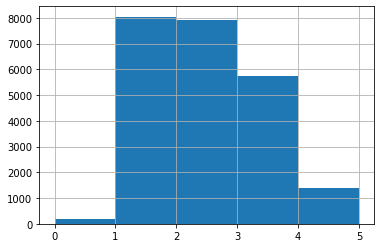

In [ ]:
data_filtered['rooms'].hist(bins=5)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество квартир с количеством комнат от 1 до 3.
Квартиры, где 0 комнат - это квартиры-студии или со свободной планировкой.

**4.6 Анализ высоты потолков**

In [ ]:
data_filtered['ceiling_height'].describe()

count    14236.000000
mean         2.761177
std          1.268774
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Очевидно, что есть очень большие значения, явно ошибочные. Их необходимо скорректировать.

In [ ]:
def calc_height(height):
    if height['ceiling_height'] >= 20:
        return height['ceiling_height'] / 10
    else:
        return height['ceiling_height']

data_filtered['ceiling_height'] = data_filtered.apply(calc_height, axis=1)
data_filtered['ceiling_height'].describe()

count    14236.000000
mean         2.718497
std          0.304798
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

Значения, записанные с ошибкой, исправлены. Теперь надо удалить из выборки "аномальные" значения. Такими будем считать значения, которые меньше 2 метра и более 4 метров. Сперва посмотрим сколько таких:

In [ ]:
data_filtered.loc[(data_filtered['ceiling_height'] <= 2) | (data_filtered['ceiling_height'] >= 4)]['ceiling_height'].count()

84

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[((data_filtered['ceiling_height'] <= 4) & (data_filtered['ceiling_height'] >= 2)) | (data_filtered['ceiling_height'].isna())]

<AxesSubplot:>

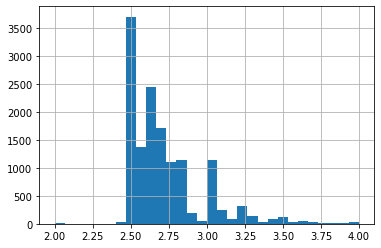

In [ ]:
data_filtered['ceiling_height'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество квартир с высотой потолков 2,5 м.

**4.7 Анализ типа этажа квартиры**


<AxesSubplot:>

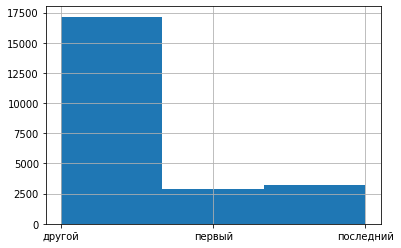

In [ ]:
data_filtered['floor_type'].hist(bins=3)

**Итог:** аномальных значений нет. Наибольшее количество квартир на этажах, не являющихся ни первым, ни последним.

**4.8 Анализ общего количества этажей в доме**


In [ ]:
data_filtered['floors_total'].describe()

count    23175.000000
mean        10.747314
std          6.613673
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Посмотрим, сколько квартир в домах, с количеством этажей больше 30.

In [ ]:
data_filtered.loc[data_filtered['floors_total'] >= 30]['floors_total'].count()

31

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[(data_filtered['floors_total'] <= 30) | (data_filtered['floors_total'].isna())]

<AxesSubplot:>

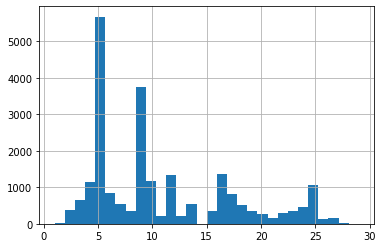

In [ ]:
data_filtered['floors_total'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество квартир в домах с пятью этажами.

**4.9 Анализ расстояния до центра города в метрах**

In [ ]:
data_filtered['city_centers_nearest_km'].describe()

count    17725.000000
mean        14.350973
std          8.584374
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

Проверим количество квартир, где удаленность от центра более 55 км.

In [ ]:
data_filtered.loc[data_filtered['city_centers_nearest_km'] >= 55]['city_centers_nearest_km'].count()

14

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[(data_filtered['city_centers_nearest_km'] <= 55) | (data_filtered['city_centers_nearest_km'].isna())]

<AxesSubplot:>

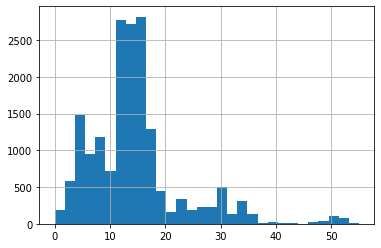

In [ ]:
data_filtered['city_centers_nearest_km'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество объявление о продаже квартир в домах, расположенных примерно в 16-18 км от центра города.

**4.10 Анализ расстояния до ближайшего парка**

In [ ]:
data_filtered['parks_nearest'].describe()

count    7774.000000
mean      493.536017
std       344.490640
min         1.000000
25%       288.000000
50%       456.000000
75%       614.750000
max      3190.000000
Name: parks_nearest, dtype: float64

Проверим количество квартир, где удаленность от парка более 2500 м.

In [ ]:
data_filtered.loc[data_filtered['parks_nearest'] >= 2500]['parks_nearest'].count()

16

Таких квартир немного, соответственно исключение слишком больших значений не скажет негативно на качестве данных.

In [ ]:
data_filtered = data_filtered.loc[(data_filtered['parks_nearest'] <= 2500) | (data_filtered['parks_nearest'].isna())]

<AxesSubplot:>

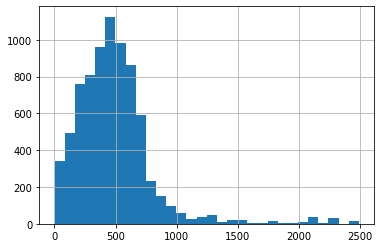

In [ ]:
data_filtered['parks_nearest'].hist(bins=30)

**Итог:** редкие данные исключены, гистограмма построена. Наибольшее количество объявление о продаже квартир в домах, расположенных примерно в 500 метрах от парка.

Посчитаем общее количество удаленных строк.

In [ ]:
f"Всего удалено {data['total_images'].count() - data_filtered['total_images'].count()} ({round(100 - (data_filtered['total_images'].count() / data['total_images'].count() * 100))}%) строк."

'Всего удалено 499 (2%) строк.'

**Общий итог фильтрации данных:** общее количество удаленных строк небольшое и не должно негативно сказаться на качестве анализа.

**4.11 Анализ времени продажи квартиры**

Построим гистограмму, найдем среднее и медианные значения по времени продажи квартиры.

<AxesSubplot:>

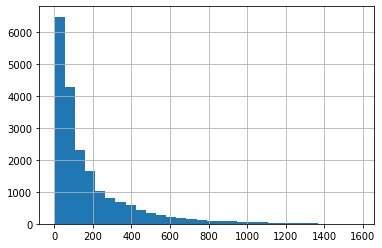

In [ ]:
data_filtered['days_exposition'].hist(bins=30)

In [ ]:
data_filtered['days_exposition'].describe()

count    20139.000000
mean       178.987636
std        217.826173
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Итог:** медиана составляет 94 дня, среднее - 178 дней.  
Быстрыми продажами можно назвать те, которые завершились за 45 дней и менее, долгие те, которые не завершены больше 228 дней.   
Обычно продажи занимают до 100 дней, это видно по гистограмме (два наибольших пика в зоне до 100 дней).

**4.12 Анализ факторов, которые влияют на общую стоимость объекта**

**4.12.1 Анализ корреляции между общей ценой и общей площадью.**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

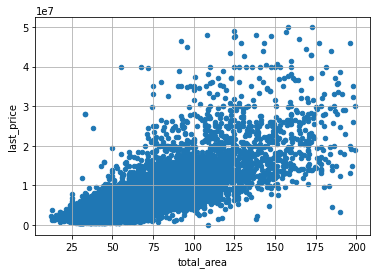

In [ ]:
data_filtered.plot(x='total_area', y='last_price', kind='scatter', grid=True)

In [ ]:
data_filtered['total_area'].corr(data_filtered['last_price'])

0.764403702307734

**Итог:** согласно диаграмме и расчету, есть корреляция средней величины.

**4.12.2 Анализ корреляции между общей ценой и жилой площадью**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

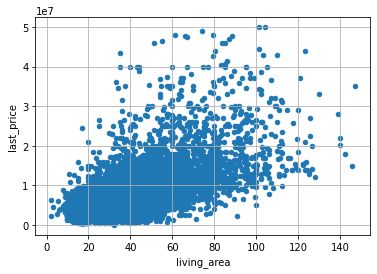

In [ ]:
data_filtered.plot(x='living_area', y='last_price', kind='scatter', grid=True)

In [ ]:
data_filtered['living_area'].corr(data_filtered['last_price'])

0.6525047542262226

**Итог:** согласно диаграмме и расчету, есть корреляция средней величины.

**4.12.3 Анализ корреляции между общей ценой и площади кухни**

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

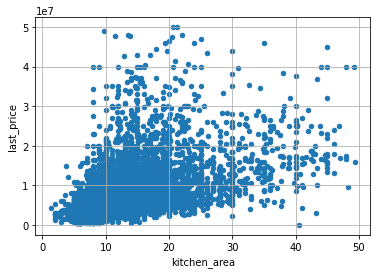

In [ ]:
data_filtered.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)

In [ ]:
data_filtered['kitchen_area'].corr(data_filtered['last_price'])

0.579246728559476

**Итог:** согласно диаграмме и расчету, корреляция есть, но слабее, чем в случае с общей площадью.

**4.12.4 Анализ корреляции между общей ценой и количеством комнат**

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

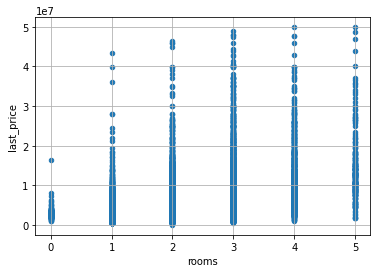

In [ ]:
data_filtered.plot(x='rooms', y='last_price', kind='scatter', grid=True)

In [ ]:
data_filtered['rooms'].corr(data_filtered['last_price'])

0.4572818078864725

**Итог:** согласно диаграмме и расчету, коэффициент корреляции есть, но достаточно небольшая.

**4.12.5 Анализ корреляции между общей ценой и этажом, на котором расположена квартира**

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

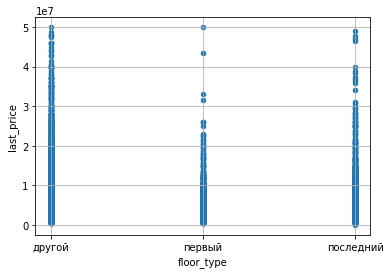

In [ ]:
data_filtered.plot(x='floor_type', y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='floor_type'>

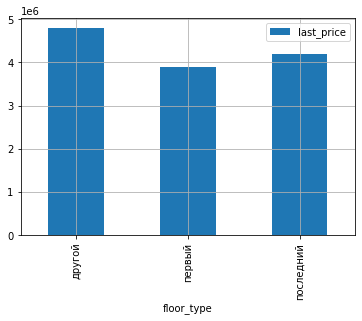

In [ ]:
floor_price_stat = data_filtered.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_price_stat.plot(y='last_price', kind='bar', grid=True)

**Итог:** как видно из диаграмм, дешевле квартиры, которые расположены на первом этаже.

**4.12.6 Анализ корреляции между общей ценой и датой размещения объявления**

Диаграмма рассеивания в данном случае не подойдет. Применем линейный график и построим его по медианному значению.

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

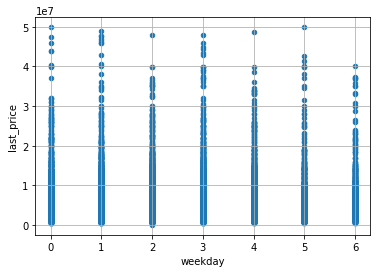

In [ ]:
data_filtered.plot(x='weekday', y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='weekday'>

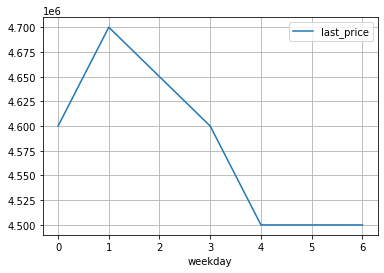

In [ ]:
weekday_price_stat = data_filtered.pivot_table(index='weekday', values='last_price', aggfunc='median')
weekday_price_stat.plot(y='last_price', kind='line', grid=True)

<AxesSubplot:xlabel='month_public', ylabel='last_price'>

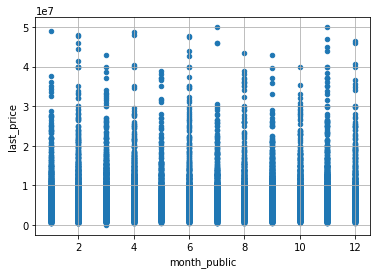

In [ ]:
data_filtered.plot(x='month_public', y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='month_public'>

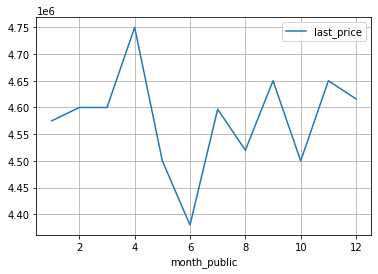

In [ ]:
month_price_stat = data_filtered.pivot_table(index='month_public', values='last_price', aggfunc='median')
month_price_stat.plot(y='last_price', kind='line', grid=True)

<AxesSubplot:xlabel='year_public', ylabel='last_price'>

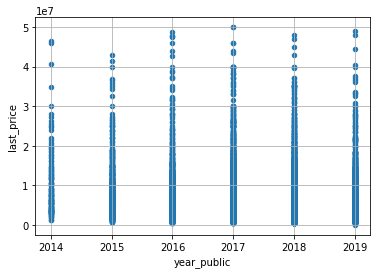

In [ ]:
data_filtered.plot(x='year_public', y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='year_public'>

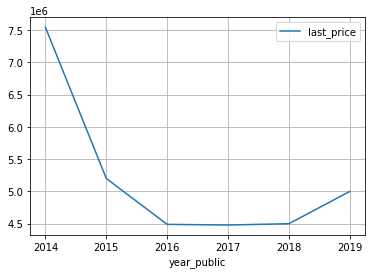

In [ ]:
year_price_stat = data_filtered.pivot_table(index='year_public', values='last_price', aggfunc='median')
year_price_stat.plot(y='last_price', kind='line', grid=True)

**Итог:** согласно построенным графикам, наибольшая цена у объявлений, размещенных во вторник, наименьшая - размещенных с пятницу по воскресенье.  
Также наибольшая цена у объявлений, размещенных в 2014 году, после этого наблюдается снижение цены.

**4.13 Анализ средней цены одного квадратного метра в Топ-10 населенных пунктах по количеству объявлений**

In [ ]:
data_filtered['locality_name'].value_counts().head(10)

Санкт-Петербург    15266
Мурино               589
Кудрово              472
Шушары               440
Всеволожск           397
Пушкин               359
Колпино              337
Парголово            326
Гатчина              307
Выборг               236
Name: locality_name, dtype: int64

In [ ]:
big_cities = data_filtered.pivot_table(aggfunc=['count', 'mean'], index='locality_name', values='meter_cost')
big_cities.columns = ['count_flat', 'mean_cost']
big_cities = big_cities.sort_values(by='count_flat', ascending=False).head(10)
big_cities.sort_values(by='mean_cost', ascending=False)

,count_flat,mean_cost
locality_name,,
Санкт-Петербург,15266,111938.943489
Пушкин,359,102941.281560
Кудрово,472,95324.930508
Парголово,326,90332.262638
Мурино,589,86087.266910
Шушары,440,78677.364318
Колпино,337,75333.295816
Гатчина,307,68746.146515
Всеволожск,397,68605.572947


**Итог:** наибольшая средняя цена за квадратный метр в Санкт-Петербурге, наименьшая (из Топ-10 городов) в Выборге.

**4.14 Анализ стоимости квартиры в зависимости от удаленности от центра города**

<AxesSubplot:xlabel='city_centers_nearest_km'>

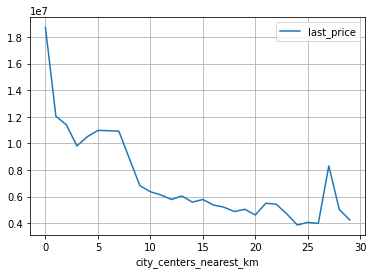

In [ ]:
flat_petersburg = data_filtered.query('locality_name == "Санкт-Петербург"')
flat_petersburg.pivot_table(aggfunc='mean', index='city_centers_nearest_km', values='last_price').plot(y='last_price', kind='line', grid=True)

**Итог:** из графика видно, что чем дальше квартира от центра города, тем ниже средняя цена квартиры.

### Общий вывод

**1. Предварительная обработка данных**
- В представленных данных были пропущены значения, среди которых площади (жилая, кухонная) квартиры, расстояние до парков и озер, наличие или отсутствие балконов. Причина отсутствия значений: пользователи не указали данные величины при заполнении объявления, так как либо этих параметров нет, либо пользователи не знали нужные значения.
- В ряде данных, к примеру, в высоте потолков, были допущены ошибки. Так, встречались значения 14 метров, 30 метров, 100 метров. Причина таких значений: ошибка пользователя при заполнении объявления. Указанные величины были удалены из выборки либо скорректированы.
- В присланных значениях были по разному указаны названия городов и населенных пунктов. Для корректного расчета названия городов и населенных пунктов были приведены к одному значению.
- В целях упрощения анализа были добавлены новые столбцы: стоимость одного квадратного метра, день, месяц и год подачи объявления, переведено расстояние до центра города из метров в километры.

**2. Основные выводы исследования**
- Большинство объявлений актуальны на сайте на срок до 100 дней, однако есть объявления, которые "висят" свыше 1500 дней.
- Сильнее всего на стоимость квартиры влияют площади квартиры (общая, жилая, кухни) и количество комнат. В тоже время стоимость квартиры не зависит от месяца подачи объявления. Следовательно, сезонность на стоимость квартиры практически не вляет. Однако отмечается зависимость: дороже квартиры, объявления о которых размещены во вторник.
- Наибольшая цена за квадратный метр наблюдается в Санкт-Петербурге, наименьшая - в Выборге (из наиболее крупных городов).
- В Санкт-Петербурге цена квартиры снижается по мере удаления от центра: чем дальше от центра, тем дешевле квартира.

**3. Рекомендации**  
В целях улучшения качества анализа рекомендуется выполнить следующее:
- Предоставить данные за больший временной период.
- Организовать базу населенных пунктов и ограничить возможные варианты в столбце "locality_name" только значениями данной базы. Это позволит точнее соотносить населенные пункты.
- Предоставить данные по ориентировочному адресу объектов. Это позволит устранить пропуски в столбцах расстояния до парков, аэропортов, прудов.